In [153]:
import numpy as np
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sigmoid(x):
    return expit(x)

In [3]:
data = load_breast_cancer()
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,train_size=.75, random_state=0)

/home/sacha/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
X = normalize(X_train).transpose()
Y = Y_train.transpose()

In [218]:
w = np.random.randn(30, 1)*np.sqrt(1/(30-1))
b = np.array([0])
alpha = 0.01
beta = 0.9
betatwo = 0.999
eta = 10e-8
lambd = 10e-4
vdW = 0
vdB = 0
sdW = 0
sdB = 0
batch_size = 512

In [219]:
for i in range(1,30000):
    for t in range(0, len(X), batch_size):
                  
        #batches
        x_batch = X[:, t:t+batch_size]
        y_batch = Y[t:t+batch_size]
        
        #forward
        Z = np.dot(w.transpose(), x_batch) + b
        A = sigmoid(Z)
        L = np.sum(-(y_batch*np.log10(A)+(1-y_batch)*np.log10(1-A)))/len(A) + (lambd/batch_size)*np.dot(w.transpose(), w)[0][0] # Binary Loss

        #backward (derivatives)
        dZ = (A-y_batch)

        #W
        dW = x_batch.dot(dZ.transpose())/len(dZ)
        vdW = beta*vdW + (1-beta)*dW # Momentum Terms
        vdWC = vdW/(1-beta**i) # Bias Correction
        sdW = betatwo*sdW + (1-betatwo)*dW**2 #RMS terms
        sdWC = sdW/(1-betatwo**i) # Bias Correction
        w = w - alpha*(vdWC/(np.sqrt(sdWC) + eta) + (lambd/batch_size)*w) # Adam + l2 regularization

        #B
        dB = np.sum(dZ)/len(dZ)
        vdB = beta*vdB + (1-beta)*dB # Momentum Terms
        vdBC = vdB/(1-beta**i) # Bias Correction
        sdB = betatwo*sdB + (1-betatwo)*dB**2 # RMS terms
        sdBC = sdB/(1-betatwo**i) # Bias Correction
        b = b - alpha*vdBC/(np.sqrt(sdBC) + eta) # Adam

        if(i%5000==0 or i==1):
            print('Log loss (with regularization): {}'.format(L))

Log loss (with regularization): 126.40723779958059
Log loss (with regularization): 37.947793541393544
Log loss (with regularization): 32.500232527678385
Log loss (with regularization): 29.96741750175908
Log loss (with regularization): 28.22273356152372
Log loss (with regularization): 27.108391499782385


In [222]:
Z = np.dot(w.transpose(), normalize(X_test).transpose()) + b
A = sigmoid(Z)
A[A>0.5] = 1
A[A<=0.5] = 0
predictions = A
print(classification_report(Y_test, predictions.reshape(143,)))

             precision    recall  f1-score   support

          0       0.91      0.94      0.93        53
          1       0.97      0.94      0.96        90

avg / total       0.94      0.94      0.94       143



In [246]:
f1 = X[1:2, :][0]
f2 = X[2:3, :][0]

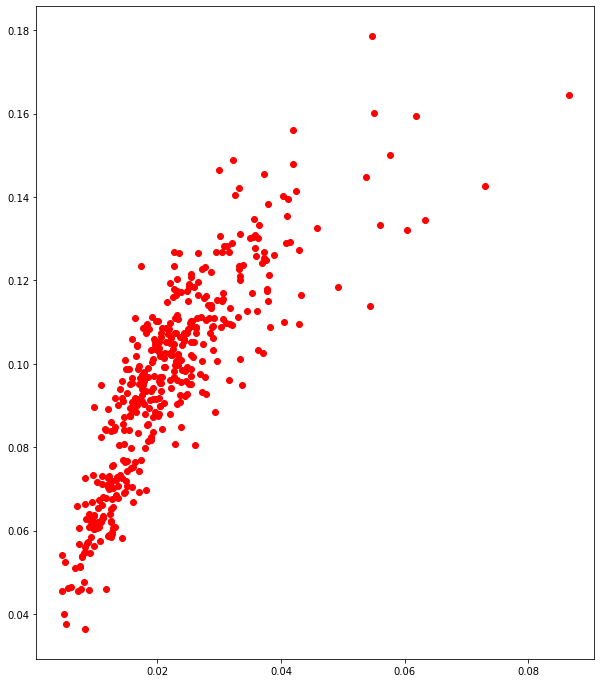

In [247]:
plt.figure(figsize=(10,12))
plt.plot(f1, f2, 'ro')